In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
mnist=tf.keras.datasets.mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images1, train_labels), (test_images1, test_labels)=mnist.load_data()

In [3]:
import keras
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

train_images=train_images.reshape((60000, 28, 28, 1))
train_images=train_images.astype('float32')/255
test_images1=test_images.copy()
test_images=test_images.reshape((10000, 28, 28, 1))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

Using TensorFlow backend.


In [4]:
x_test_noise=[]
for i in range(len(test_images1)):
    im=test_images1[i].copy()
    im=im+3*im.std()*np.random.random(im.shape)*1.2 #adding noise to dataset
    x_test_noise.append(im)
x_test_noise=np.asarray(x_test_noise)
x_test_noise1=x_test_noise.reshape((10000, 28, 28, 1))
x_test_noise1=x_test_noise1.astype('float32')/255

In [5]:
#svd on all test data
el=40
x_test_noise_flat=x_test_noise.reshape((10000,784))
U,S,VT=np.linalg.svd(x_test_noise_flat)
Snew=np.diag(S[range(0,el)])
Unew=U[:,range(0,el)]
VTnew=VT[range(0,el)]
x_test_noise_flat=np.matmul(Unew,np.matmul(Snew,VTnew))
x_test_noise_flat=x_test_noise_flat.reshape(10000,28,28)
x_test_noise_flat1=x_test_noise_flat.reshape((10000, 28, 28, 1))
x_test_noise_flat1=x_test_noise_flat1.astype('float32')/255


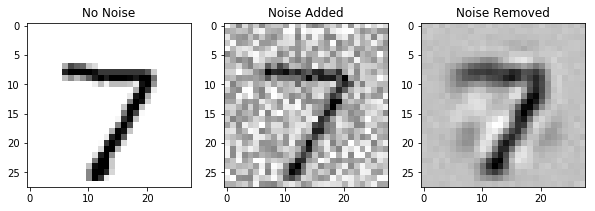

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("No Noise")
plt.imshow(test_images1[0],cmap='gray_r')
plt.subplot(1,3,2)
plt.title("Noise Added")
plt.imshow(x_test_noise[0],cmap='gray_r')
plt.subplot(1,3,3)
plt.title("Noise Removed")
plt.imshow(x_test_noise_flat[0],cmap='gray_r')


In [7]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
____

In [8]:
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy'
              ,metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 25s 415us/step - loss: 0.1722 - acc: 0.94720s - loss: 0.175
Epoch 2/5
60000/60000 [==============================] - 25s 423us/step - loss: 0.0464 - acc: 0.9858
Epoch 3/5
60000/60000 [==============================] - 25s 412us/step - loss: 0.0318 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.0245 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 24s 397us/step - loss: 0.0193 - acc: 0.9938


In [9]:
acctrack=[]
els=[1,5,10,15,20,40,100,200,300,400,500,600,700,750]
eltrack=[]
loss,acc=model.evaluate(test_images,test_labels)
acctrack.append(acc)
eltrack.append('No Noise')
loss,acc=model.evaluate(x_test_noise1,test_labels)
acctrack.append(acc)
eltrack.append('Noise')

for i in range(len(els)):
    x_test_noise_flat=x_test_noise.reshape((10000,784))
    U,S,VT=np.linalg.svd(x_test_noise_flat)
    Snew=np.diag(S[range(0,els[i])])
    Unew=U[:,range(0,els[i])]
    VTnew=VT[range(0,els[i])]
    x_test_noise_flat=np.matmul(Unew,np.matmul(Snew,VTnew))
    x_test_noise_flat=x_test_noise_flat.reshape(10000,28,28)
    x_test_noise_flat1=x_test_noise_flat.reshape((10000, 28, 28, 1))
    x_test_noise_flat1=x_test_noise_flat1.astype('float32')/255
    loss,acc=model.evaluate(x_test_noise_flat1,test_labels)
    acctrack.append(acc)
    eltrack.append(str(els[i])+' PC')
print('fin')

10000/10000 [==============================] - 1s 120us/step
fin


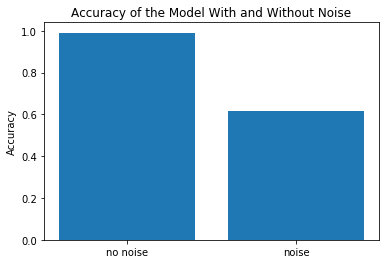

In [24]:
plt.bar(x=eltrack[:2],height=acctrack[:2])
plt.title("Accuracy of the Model With and Without Noise")
plt.ylabel("Accuracy")
plt.show()

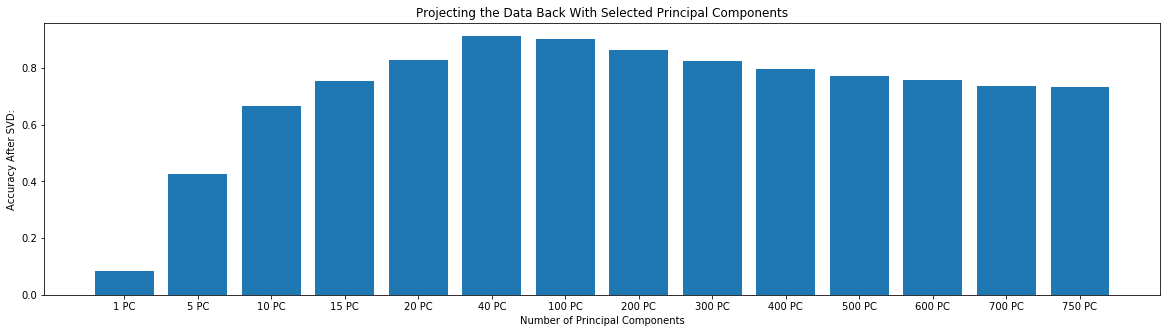

In [16]:
plt.figure(figsize=(20,5))
plt.title("Projecting the Data Back With Selected Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy After SVD:")
plt.bar(x=eltrack[2:],height=acctrack[2:])
plt.show()

In [12]:
new_list=[]
new_list_acc=[]
for i in range(len(eltrack)):
    if i==3:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    elif i==5:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    elif i==7:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    if i==8:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    if i==10:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    if i==12:
        new_list.append(eltrack[i])
        new_list_acc.append(acctrack[i])
    else:
        pass

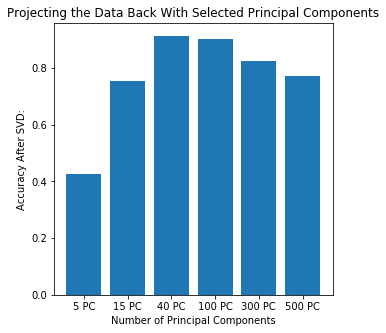

In [14]:
plt.figure(figsize=(5,5))
plt.title("Projecting the Data Back With Selected Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy After SVD:")
plt.bar(x=new_list,height=new_list_acc)
plt.show()